# Creation of tertiary structures from files

With PyRNA, an object pyrna.features.TertiaryStructure is made with a single molecular chain. Consequently, the function parse_pdb() returns a list of such objects. 

In [1]:
h = open('../data/1ehz.pdb')
pdb_content = h.read()
h.close()

from pyrna.parsers import parse_pdb
tertiary_structures = parse_pdb(pdb_content)
print tertiary_structures[0].residues[1]

{'atoms': [{'coords': [50.193, 51.19, 50.534], 'name': 'O3P'}, {'coords': [50.626, 49.73, 50.573], 'name': 'P'}, {'coords': [49.854, 48.893, 49.562], 'name': 'O1P'}, {'coords': [52.137, 49.542, 50.511], 'name': 'O2P'}, {'coords': [50.161, 49.136, 52.023], 'name': "O5'"}, {'coords': [50.216, 49.948, 53.21], 'name': "C5'"}, {'coords': [50.968, 49.231, 54.309], 'name': "C4'"}, {'coords': [50.45, 47.888, 54.472], 'name': "O4'"}, {'coords': [52.454, 49.03, 54.074], 'name': "C3'"}, {'coords': [53.203, 50.177, 54.425], 'name': "O3'"}, {'coords': [52.781, 47.831, 54.957], 'name': "C2'"}, {'coords': [53.018, 48.156, 56.313], 'name': "O2'"}, {'coords': [51.502, 47.007, 54.836], 'name': "C1'"}, {'coords': [51.628, 45.992, 53.798], 'name': 'N9'}, {'coords': [51.064, 46.007, 52.547], 'name': 'C8'}, {'coords': [51.379, 44.966, 51.831], 'name': 'N7'}, {'coords': [52.197, 44.218, 52.658], 'name': 'C5'}, {'coords': [52.848, 42.992, 52.425], 'name': 'C6'}, {'coords': [52.826, 42.291, 51.404], 'name': 'O

# Creation of tertiary structures from databases¶

Now, we will import a 3D structure from the Protein Databank. As an example, we will use the solved 3D structure of a tRNA.

In [16]:
from pyrna.db import PDB
from pyrna.parsers import parse_pdb
pdb = PDB()
tertiary_structures = parse_pdb(pdb.get_entry('1EHZ'))

# Annotation of a tertiary structure

We launch Rnaview from a Docker image.

In [17]:
from pyrna.computations import Rnaview
secondary_structures = []
for ts in tertiary_structures:
    secondary_structure, tertiary_structure = Rnaview().annotate(ts)
    secondary_structures.append(secondary_structure)

The function annotate() from Rnaview returns an object pyrna.features.SecondaryStructure. This object contains a list of helices, single-strands and tertiary interactions. If you need more, the class pyrna.features.SecondaryStructure provides two functions:

 * find_junctions(): this function finds and stores all the junctions in the object pyrna.features.SecondaryStructure (apical loops, inner loops, 3- to n-way junctions)
 * find_stem_loops(): using the junctions, this function finds and stores all the stem loops in the object pyrna.features.SecondaryStructure. A stem loop is defined as a set of helices, linked with inner loops, with an apical loop at one end and a 3- to n-way junction at the other end. The stem loops can be seen at the "arms and legs" of an RNA structure.

In [18]:
ss = secondary_structures[0]
ts = tertiary_structures[0]
ss.find_junctions()
ss.find_stem_loops() #if no junctions are available in the secondary structure, the function find_junctions() is called automatically

# Extraction of 3D coordinates for structural domains

We can use the location of the structural domains identified (helices, junctions, stem-loops,...) to extract their 3D coordinates and to store them in new PDB files.

In [31]:
from pyrna.parsers import to_pdb
from pyrna.features import Location

for index, stem_loop in enumerate(ss.stem_loops):
    with open('/Users/fjossinet/tmp/stem_loop_%i.pdb'%index, 'w') as f: 
        f.write(to_pdb(ts, location = Location(nested_lists = stem_loop['location'])))

If we load the PDB files generated in [UCSF Chimera](http://goo.gl/s6ZaO), we can see that each PDB file stores the 3D coordinates for a stem-loop (the anticodon stem-loop is in green, the D stem-loop in red and the T stem-loop in pink):

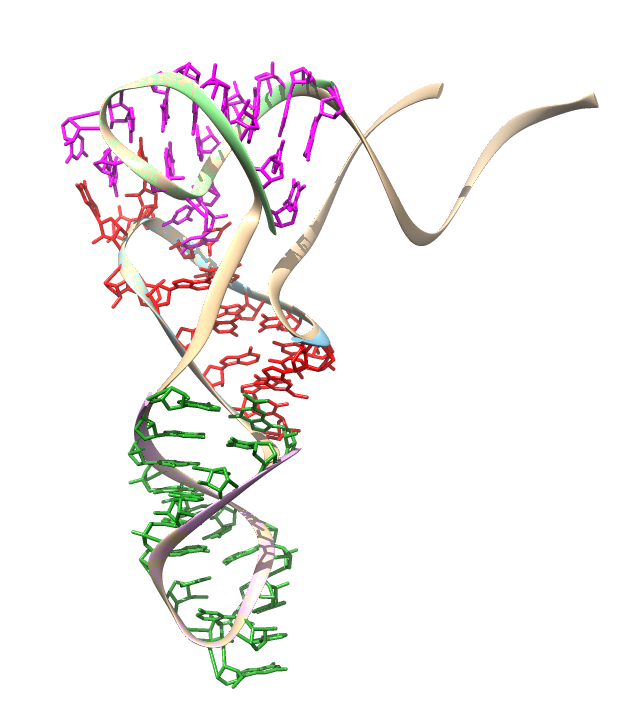

In [7]:
from IPython.display import Image
Image("../data/1EHZ_stem_loops.png")

We can do the same for the junctions.

In [30]:
for index, junction in enumerate(ss.junctions):
    with open('/Users/fjossinet/tmp/junction_%i.pdb'%index, 'w') as f:
        location = Location(nested_lists = junction['location'])
        f.write(to_pdb(ts, location = location))

[[7, 10], [25, 26], [44, 49], [65, 66]]
[[13, 22]]
[[32, 38]]
[[53, 61]]


If we load now the PDB files generated in [UCSF Chimera](http://goo.gl/s6ZaO), we can see that each PDB file stores the 3D coordinates for a junction (the three apical loops are in blue and the 4-way junction is in red):

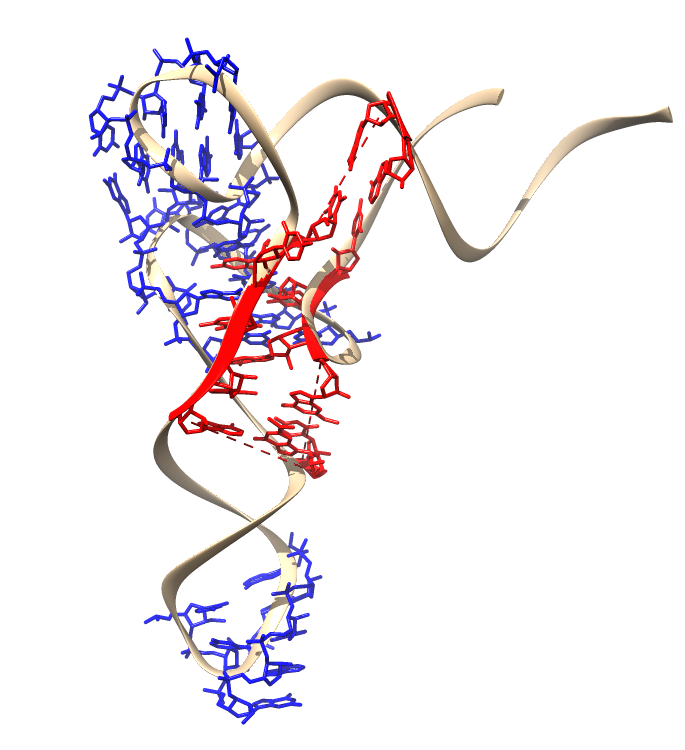

In [9]:
from IPython.display import Image
Image("../data/1EHZ_junctions.png")

We will now use the ability to extract the 3D coordinates for the helices and the junctions (apical loops, inner loops, 3-way junctions,..) identified in the [bacterial Ribonuclease P holoenzyme](http://goo.gl/aRVMSW). 

In [12]:
ts = parse_pdb(pdb.get_entry('3Q1Q'))[0]
ss, ts = Rnaview().annotate(ts)
ss.find_junctions()

for index, helix in enumerate(ss.helices):
    with open('/Users/fjossinet/tmp/helix_%i.pdb'%index, 'w') as f:
        location = Location(nested_lists = helix['location'])
        f.write(to_pdb(ts, location = location))

for index, junction in enumerate(ss.junctions):
    with open('/Users/fjossinet/tmp/junction_%i.pdb'%index, 'w') as f:
        location = Location(nested_lists = junction['location'])
        f.write(to_pdb(ts, location = location))

We open the PDB files generated in [UCSF Chimera](http://goo.gl/s6ZaO). The helices are in red and the junctions (apical loops, inner loops,3-way junctions,..) are in green (the tRNA is in blue).

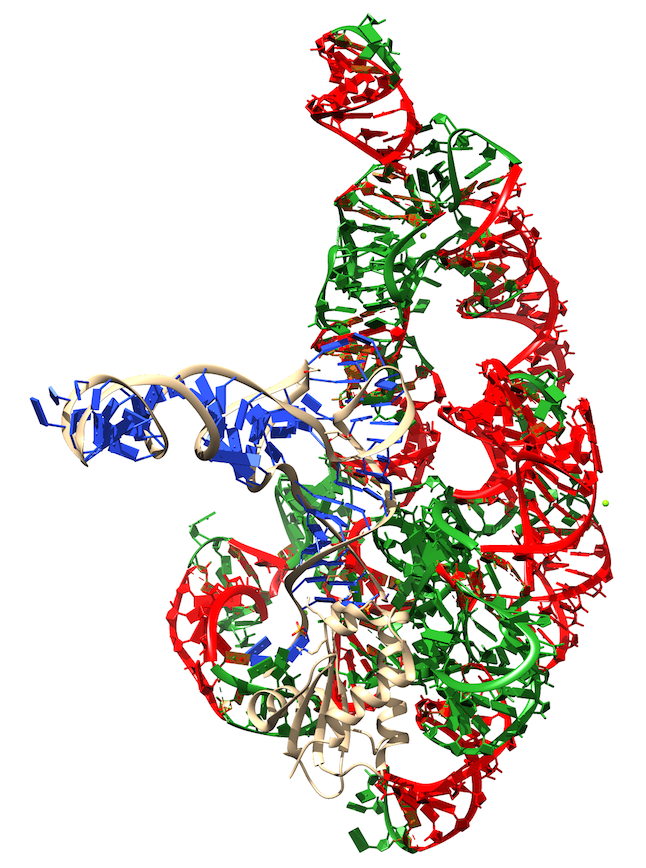

In [10]:
from IPython.display import Image
Image("../data/3Q1Q.png")